<a href="https://colab.research.google.com/github/pranaya-mathur/Deep-Learning-Projects/blob/master/Google_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
	
!wget --header="Host: sds-platform-private.s3-us-east-2.amazonaws.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.100 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-IN,en-GB;q=0.9,en-US;q=0.8,en;q=0.7,hi;q=0.6" --header="Referer: https://www.superdatascience.com/pages/deep-learning" "https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P16-Recurrent-Neural-Networks.zip" -O "P16-Recurrent-Neural-Networks.zip" -c

--2019-08-22 05:59:41--  https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P16-Recurrent-Neural-Networks.zip
Resolving sds-platform-private.s3-us-east-2.amazonaws.com (sds-platform-private.s3-us-east-2.amazonaws.com)... 52.219.96.24
Connecting to sds-platform-private.s3-us-east-2.amazonaws.com (sds-platform-private.s3-us-east-2.amazonaws.com)|52.219.96.24|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24237 (24K) [application/zip]
Saving to: ‘P16-Recurrent-Neural-Networks.zip’

P16-Recurrent-Neura 100%[===================>]  23.67K   129KB/s    in 0.2s    

2019-08-22 05:59:42 (129 KB/s) - ‘P16-Recurrent-Neural-Networks.zip’ saved [24237/24237]



In [0]:
import zipfile
zip_ref = zipfile.ZipFile("P16-Recurrent-Neural-Networks.zip", 'r')
zip_ref.extractall("data")
zip_ref.close()


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset_train = pd.read_csv("data/Recurrent_Neural_Networks/Google_Stock_Price_Train.csv")
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
training_set = dataset_train.iloc[:,1:2].values
training_set.shape

(1258, 1)

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)

In [0]:
X_train = []
y_train = []

for i in range(60,1258):

  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])

In [0]:
X_train,y_train  = np.array(X_train), np.array(y_train)

In [10]:
X_train.shape

(1198, 60)

In [11]:
y_train.shape

(1198,)

In [12]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1198, 60, 1)

In [0]:
from keras.layers import Dense, Input, Dropout, LSTM
from keras.models import Model

In [17]:
input_ = Input(shape=(60,1))
x = LSTM(50, return_sequences=True)(input_)
x = Dropout(0.2)(x)
x = LSTM(50,return_sequences=True)(x)
x= Dropout(0.2)(x)
x = LSTM(50,return_sequences=True)(x)
x= Dropout(0.2)(x)
x = LSTM(50)(x)
x = Dropout(0.2)(x)
x = Dense(1)(x)

model = Model(input = input_,output = x)
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 60, 1)             0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_9 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_10 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_11 (Dropout)         (None, 60, 50)            0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if sys.path[0] == '':


In [18]:
model.compile(optimizer="adam",loss="mean_squared_error")

W0822 08:05:17.426596 140024960087936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [21]:
history = model.fit(X_train,y_train,epochs=10,batch_size=64)

Epoch 1/10
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0045
Epoch 2/10
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0046
Epoch 3/10
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0047
Epoch 4/10
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0047
Epoch 5/10
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0045
Epoch 6/10
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0043
Epoch 7/10
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0042
Epoch 8/10
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0042
Epoch 9/10
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0041
Epoch 10/10
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0041


In [22]:
dataset_test = pd.read_csv("data/Recurrent_Neural_Networks/Google_Stock_Price_Test.csv")
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [0]:
real_stock_price = dataset_test.iloc[:,1:2].values

In [0]:
dataset_total = pd.concat((dataset_train["Open"],dataset_test["Open"]),axis=0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [0]:
X_test = []

for i in range(60,80):

  X_test.append(inputs[i-60:i,0])

In [26]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
print(X_test.shape)

(20, 60, 1)


In [27]:
predictions = model.predict(X_test)
print(predictions.shape)

(20, 1)


In [0]:
predictions = sc.inverse_transform(predictions)

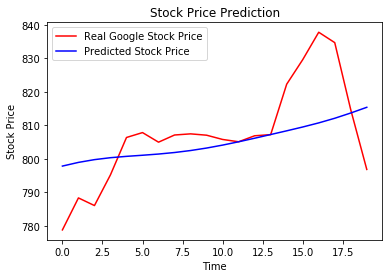

In [30]:
plt.plot(real_stock_price,color="red",label="Real Google Stock Price")
plt.plot(predictions,color="blue",label="Predicted Stock Price")
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()